<center> <h1>AFP VEŽBA 6</h1> </center>

<center> <h1> Određivanje rastojanja do zbijenog jata pomoću SQL pretrage </h1> </center>

<center> <h2>april 2022.</h2> </center>

## Nataša Pavlov
### natasa_pavlov@matf.bg.ac.rs

Pre svega se uvoze paketi neophodni za izvođenje vežbe. Pretprostavlja se da je čitaoc dosad upoznat da paketima poput ```numpy```, ```matplotlib```, ```pandas``` i ```astropy```, dok će ostali paketi, ```speclite``` i ```astroquery``` biti detaljnije uvedeni kasnije. U referencama na kraju se mogu naći linkovi za navedene pakete.

In [26]:
import numpy as np
import pandas as pd
import astropy.coordinates as coords
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib import rcParams

#paket za filtere u različitim bazama podataka
from speclite import filters 

#astroquery - paket za pretragu podataka direktno iz Jupyter notebook-a
from astroquery.sdss import SDSS 
from astroquery.gaia import Gaia

%matplotlib inline

## Uvod

**Cilj vežbe:**
    
1. kratko osvrtanje na karakteristike **zbijenih jata**

2. prikazivanje **Hercšprung-Raselovog (HR) dijagrama**, kao odnos indeksa boje i magnitude

3. ilustracija određenih faza evolucije zvezda

4. uvod u merenja magnituda i poređenje propusnosti filtera u **različitim bazama podataka**

5. pribavljanje podataka pomoću **SQL pretrage** za odabrana jata
    
6. procena prividne magnitude Horizontalne grane na HR dijagramu i **određivanje rastojanja** do datih zbijenih jata

7. poređenje HR dobijenih za različite baze podataka za odabrana jata

## Zbijena jata (_Globular clusters_)

Zbijeno jato predstavlja gravitaciono vezani sistem zvezda sa oko 0,1 do 1 miliona zvezda zbijenih (otuda i naziv) u sferu prečnika oko 100 svetlosnih godina. Tipično rastojanje zvezda u zbijenim jatima je oko 1 svetlosna godina (poređenja radi, prosek za rastojanja zvezda u Mlečnom putu je oko 5 svetlosnih godina).

<br>

<img src="m2.png" alt="m2" width="600"/>

<br>

<center>Na Slici je prikazano zbijeno jato M2 (NGC 7089), a slika je dobijena pomoću Aladin programa.</center>


<br>
<br>
U kontekst značaja zbijenih jata, mogu se navesti nekoliko stavki:
 - homogenost zvezda u jatu implicira sličnu hemijsku kompoziciju, a samim tim i starost jata, te su odlični kandidati za teorijsko razmatranje formiranja i evolucije zvezda;
 - globularna jata su jedna od starijih zvezdanih sistema, te procena njihove starosti može dati donje ograničenje na starost svemira; - raspodela starosti svih jata i korelacija sa njihovom metaličnosti daju uvid u procese formiranja galaksije.
 
Distribucija svih dosad poznatih globularnih jata je sferno-simetrična u odnosu na centar galaksije (dakle, ne prati galaktički disk) zbog njihovog ranog stvaranja u proto-galaktičkom oblaku. Jedan od razloga što ne vidimo zbijena jata u disku je zbog pristustva prašine koja zaklanja svetlost, a drugi može biti plimsko razaranje usled interakcije sa materijom iz diska.  

Dakle, zvezde u zbijenom jatu dele sličnu istoriju (starost, metaličnost,...) s tim da se razlikuju jedino po početnoj masi. Samim tim, predstavljaju odlične kandidate za razmatranje evolucije zvezda. Na osnovu merenih magnituda i indeksa boje mogu se razmotriti različite faze evolucije zvezda.

### Sva zbijena jata u Mlečnom putu

Podaci za zbijena jata se mogu naći u HEASARC bazi podataka i katalogu _Milky Way Star Clusters_ (https://heasarc.gsfc.nasa.gov/W3Browse/all/mwsc.html). Sužavanjem opsega na zbijena jata (_broad type_=g) dobija se sledeća tabela:

In [27]:
all_jata = pd.read_table('globclust')
all_jata

,name,broad_type,rah,ram,ras,decd,decm,lii,bii,core_radius,central_radius,cluster_radius,distance,distance_modulus,log_age,metallicity
0,1636-283,g,16,39,26,-28,23.9,351.911,12.096,0.015,0.040,0.075,8308,14.745,10.10,-1.145
1,2MS-GC02,g,18,9,31,-20,47.4,9.763,-0.603,0.018,0.055,0.105,7436,15.000,10.00,-1.080
2,Arp2,g,19,28,44,-30,21.4,8.545,-20.785,0.020,0.065,0.110,28596,17.315,10.10,-1.645
3,Djorg1,g,17,47,28,-33,4.0,356.675,-2.482,0.015,0.055,0.120,13682,16.190,10.05,-1.510
4,Djorg2,g,18,1,49,-27,49.0,2.771,-2.504,0.010,0.045,0.085,6305,14.300,9.95,-0.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Terzan8,g,19,41,45,-33,59.9,5.760,-24.559,0.015,0.065,0.110,26316,17.140,10.10,-1.845
143,Terzan9,g,18,1,39,-26,50.0,3.609,-1.985,0.020,0.040,0.075,7108,14.825,10.05,-1.050
144,vdBergh-Hagen176,g,15,39,5,-50,3.1,328.410,4.341,0.020,0.060,0.100,18887,16.555,9.80,-0.100
145,vdBergh-Hagen229,g,17,31,5,-29,58.0,357.437,2.123,0.018,0.070,0.130,8197,14.930,10.10,-0.945


### Distribucija zbijenih jata u Mlečnom putu

Pomoću podataka iz tabele može se plotovati pomenuta distribucija jata.

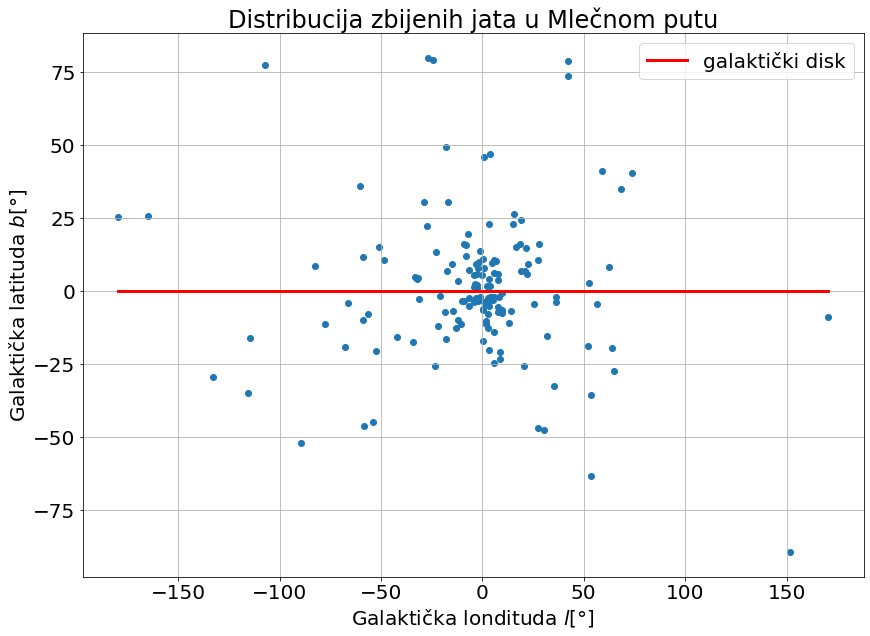

In [28]:
rcParams['figure.figsize'] = 14, 10
rcParams['lines.linewidth'] = 3
rcParams['font.size'] = 20

gal = coords.SkyCoord(l = all_jata['lii'], b = all_jata['bii'],\
                      frame = 'galactic', unit='deg')

fig = plt.figure()
ax = fig.add_subplot(111, projection = None)
ax.set_title('Distribucija zbijenih jata u Mlečnom putu')
ax.scatter(gal.l.wrap_at(180*u.deg), gal.b.wrap_at(180*u.deg))
ax.plot(gal.l.wrap_at(180*u.deg), gal.l.wrap_at(180*u.deg)*0, 'r',\
        label='galaktički disk')
ax.set_xlabel('Galaktička londituda $l[\degree]$')
ax.set_ylabel('Galaktička latituda $b[\degree]$')
plt.grid()
plt.legend()
plt.show()

## Hercšprung-Raselov (HR) dijagram

Neke od osnovnih karakteristika zvezde jedu njena luminoznost i temperatura (fotosfere). Ako je poznato rastojanje do zvezde i ako su merene prividne magnitude iste, lako se može doći do luminoznosti, a temperatura je usko povezana sa bojom zvezde. Boja zvezde se određuje kao razlika prividnih magnituda u dva filtera koja se drugačije naziva i indeks boje (npr. za B i V filter se dobija B-V indeks boje ili _colour index_ - CI). Shodno tome, zvezde se mogu rasporediti na dijagramu luminoznost-temperatura odnosno prividna magnituda-indeks boje i time se dobija poznati Hercšprung-Raselov (HR) dijagram.

<br>

<img src="HRstages.gif" alt="HRstages" width="600"/>

<br>


HR dijagram poseduje karakterističnu distribuciju čime je ograničen opseg fizičkih parametara koje zvezde mogu posedovati. Većina zvezda (u lokalnom okruženju ~90%) leži u glavnom nizu (_Main Sequence_ - MS), a položaj u nizu i životni vek zvezde je određen masom zvezde. Masivnije zvezde brže sagorevaju vodonik i silaze sa glavnog niza (_Turn off point_ - TO), dok se manje masivne dosta duže zadržavaju. Svi delovi HR dijagrama tj. glavne faze u evoluciji zvezda na primeru tipičnog zbijenog jata (M5 na slici) su: 

1. Glavni niz - Main Sequence (MS); 
2. Silazna tačka - Turn off point (TO); 
3. Predeo crvenih džinova - Red Giant Branch (RGB); 
4. Helijumski bljesak (na granici crvenih džinova) - Helium flash (Tip); 
5. Horizontalna grana - Horizontal Branch (HB); 
6. Švarcšildova praznina (u horizontalnoj grani)- Schwarzschild gap (Gap); 
7. Asimptotska grana džinova - Asymptotic Giant Branch (AGB); 
8. Beli patuljci - White Dwarfs (WD).

Detaljnije o svakoj ovoj fazi se može pročitati na http://community.dur.ac.uk/ian.smail/gcCm/gcCm_intro.html#HR. Ovaj opis važi za zvezde srednjih i malih masa (5-6 masa Sunca).

Određene faze zvezdane evolucije poseduju tačno definisane vrednosti luminoznosti, te identifikacijom neke faze (TO) na HR dijagramu podataka može se odrediti rastojanje do istih na osnovu njihovih prividnih magnituda.

# Izohrone

Svaka zvezda određene mase, starosti i metaličnosti ima svoj jedinstveni evolutivni put. Kompjuterski modeli koji interpoliraju ovu putanju nazivaju se izohrone. Na slici je primer jedne izohrone za zvezde starosti $10^{10}$ godina i metaličnosti Sunca.

In [29]:
primer_iso = pd.read_csv('primer_izohrona.txt', sep="\t", header = 0)
primer_iso

,#EEP,M/Mo,LogTeff,LogG,LogL/Lo,U,B,V,R,I,J,H,Ks,Kp,D51
0,12,0.116064,3.5068,5.2476,-2.7641,16.8955,15.3409,13.7278,12.6211,11.1710,9.7581,9.2159,8.9750,12.5753,14.3979
1,13,0.135999,3.5070,5.1778,-2.6246,16.4903,14.9733,13.3746,12.2708,10.8248,9.4101,8.8695,8.6270,12.2263,14.0335
2,14,0.162260,3.5090,5.1130,-2.4755,16.0208,14.5497,12.9709,11.8773,10.4474,9.0420,8.5020,8.2593,11.8391,13.6178
3,15,0.188896,3.5134,5.0714,-2.3500,15.5718,14.1462,12.5921,11.5180,10.1206,8.7395,8.1978,7.9575,11.4925,13.2280
4,16,0.208358,3.5165,5.0445,-2.2680,15.2779,13.8803,12.3426,11.2816,9.9065,8.5421,7.9986,7.7603,11.2647,12.9715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,275,1.044132,3.5113,0.1331,3.3221,2.7918,1.9725,0.9501,-0.8092,-2.9758,-5.4221,-6.4068,-6.7157,-1.2522,0.9550
264,276,1.044136,3.5089,0.1029,3.3428,2.8002,2.0105,0.9744,-0.8007,-2.9680,-5.4768,-6.4696,-6.7815,-1.2435,1.0030
265,277,1.044139,3.5066,0.0737,3.3627,2.7881,2.0353,0.9877,-0.7965,-2.9629,-5.5300,-6.5291,-6.8444,-1.2383,1.0381
266,278,1.044143,3.5043,0.0456,3.3818,2.7791,2.0601,1.0003,-0.7905,-2.9570,-5.5813,-6.5861,-6.9041,-1.2323,1.0715


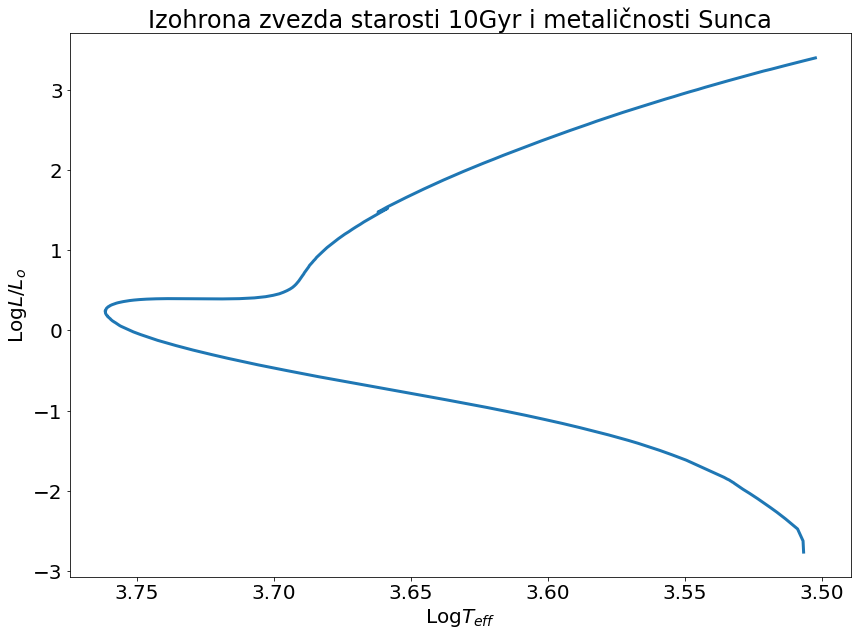

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Izohrona zvezda starosti 10Gyr i metaličnosti Sunca')
ax.invert_xaxis()
ax.set_xlabel('Log$T_{eff}$')
ax.set_ylabel('Log$L/L_o$')
ax.plot(primer_iso['LogTeff'], primer_iso['LogL/Lo'])
plt.show()

# Određivanje rastojanja

Izohrona se može prikazati preko apsolutne magnitude za datu bazu podataka, a na istom grafiku se mogu prikazati i sirovi podaci tj. prividna magnituda. Samim tim, razlika između podataka i izohrone odnosno prividne i apsolutne magnitude predstavlja _distance modulus_ ($\mu$) i na osnovu njega se može grubo odrediti rastojanje do jata pomoću Pogsonovog zakona:

$$\Large{\mu = m - M = 5\log(d) + 5}$$
<br>
<center>
$m$ - prividna magnituda;<br>
$M$ - apsolutna magnituda;<br>
$\mu - \textit{distance modulus}$;<br>
$d$ - udaljenost do jata.
</center>

Na slici ispod je prikazan metod određivanja rastojanja na SDSS podacima.

<br>

<img src="mu.gif" alt="mu" width="600"/>

<br>

## SDSS i Gaia filteri

Različite baze podataka imaju različito definisane filtere, pa samim tim i fotometrijske magnitude zavise od ovih filtera. Primera radi, SDSS poseduje **u**, **g**, **r**, **i**, **z** magnitude, dok Gaia ima definisane **BR**, **G** i **RP** magnitude. 

Za prikazivanje transmisije filtera u zavisnosti od talasne dužine (tzv. _filter response curves_) za određene baze podataka, zgodno je iskoristiti paket ```speclite``` koji poseduje funkciju ```filters```. Najpre se mogu izlistati standardne grupe filtera koje paket poseduje: 

In [31]:
filters.filter_group_names

['sdss2010',
 'decam2014',
 'wise2010',
 'hsc2017',
 'lsst2016',
 'bessell',
 'BASS',
 'MzLS',
 'Euclid',
 'decamDR1',
 'decamDR1noatm',
 'gaiadr2']

U sklopu pojedinačne grupe, recimo SDSS, mogu se izlistati pojedinačni filteri za datu grupu (od ranije znamo da očekujemo u, g, r, i, z):

In [32]:
filters.load_filters('sdss2010-*').names

['sdss2010-u', 'sdss2010-g', 'sdss2010-r', 'sdss2010-i', 'sdss2010-z']

Sada konačno mogu da se prikažu transmisione krive za SDSS i Gaia objedinjene na jednom dijagramu radi poređenja:

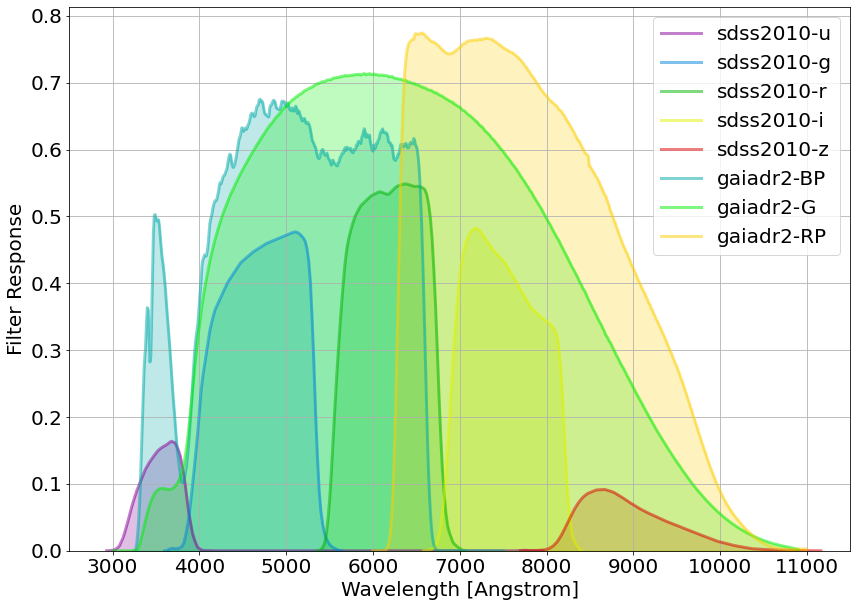

In [33]:
#parametre za plotovanje menjati po ličnoj preferenciji
rcParams['figure.figsize'] = 14, 10
rcParams['lines.linewidth'] = 3
rcParams['font.size'] = 20

both = filters.load_filters('sdss2010-*','gaiadr2-*')
filters.plot_filters(both, wavelength_limits=(2500, 11500))

Odavde je jasno da se magnitude razlikuju po opsegu talasnih dužina za različite baze podataka. 

Ostavlja se sloboda čitaocu da istraži i uporedi ostale grupe filtera. c:

<hr><hr><hr><hr><hr>

# ZADATAK VEŽBE

**1. Odabrati jedno od jata:** 
- NGC7089
- NGC5272
- NGC5904
- NGC6205
- NGC7078
- NGC5024
- NGC6341

**2. Napisati SQL query za podatke iz:**
 - a) SDSS baze;
 - b) Gaia baze;

- Oba SQL koda treba da pretraže kružni isečak neba sa centrom u koordinatama samog jata i radijusom navedenim za svako jato kao _central\_radius\_deg_ među HEASARC podacima o jatima (voditi računa o konverziji jedinica);

- Podaci neophodni za objekte u datom polju su:
  a) u, g, r magnitude za SDSS i G, BP, RP magnitude za Gaia (opciono, radi provere, mogu i rektascenzija i deklinacija, a za opštu radost ostale magnitude, atenuacioni koeficijent za odgovarajuće magnitude itd.);
  b) ograničiti pretražene objekte na zvezde
  
**Pomoć:** Definisati SQL u obliku stringa na sledeći način (SDSS primer):

```
sql = f"SELECT [...]\
        FROM   [...]\
        WHERE  [...]"
```

**3. Proslediti SQL kodove u ```astroquery``` i prikazati tabelarno rezltate (preporuka: ```pandas```)**

Potrebno je od oko 1000 zvezda do oko 3000 za dobijanje dobrog statističkog uzorka (više podataka će prebukirati plot i biće teško da se vide određeni delovi HR dijagrama)

Korisni linkovi:
- SDSS: http://skyserver.sdss.org/dr10/en/help/docs/realquery.aspx
- Gaia: https://gea.esac.esa.int/archive/
    
Funkcije za prosleđivanje SQL:
- SDSS: ```SDSS.query_sql(sql)```
- Gaia: ```Gaia.launch_job(sql).get_results()```

**4. Plotovati sirove podatke**

**5. Na osnovu podataka o starosti i metaličnosti jata iz HEASARC tabele generisati izohronu za odabrano jato i odgovarajuće magnitude i skinuti podatke:**
- link: http://stellar.dartmouth.edu/models/isolf_new.html

**6. Plotovati sirove podatke i izohronu**

**7. Fitovati izohronu (slobodnom, grubom procenom) na sirove podatke na osnovu razlike između _Turn off point_, a samim tim definisati i vrednost _distance modulus_**

**8. Na osnovu _distance modulus_ vrednosti odrediti rastojanje do jata**

**9. Uporediti dobijenu vrednost rastojanja sa vrednošću iz HEASARC tabele i odrediti relativnu grešku**

- Pogledati detaljnije informacije vezane za udaljenost koje su date u tabli (HEASARC): https://heasarc.gsfc.nasa.gov/W3Browse/star-catalog/mwsc.html#distance

**10. Prodiskutovati vrednosti rastojanja. Koji faktori utiču na određivanje rastojanja? Zbog čega se vredosti mogu značajno razlikovati?**

**11. Uraditi SQL pretragu za jata: NGC 6402,  u SDSS bazi. Koji je rezltat pretrage? Proveriti objekat na: http://skyserver.sdss.org/dr17/VisualTools/navi. Zbog čega se dobija ovakav rezultat pretrage?**

**12. Plotovati podatke i izohrone za obe baze podataka. U čemu se razlikuju podaci iz ovih baza i zašto?**

**U izveštaju je potrebno da stoje SQL kodovi i za SDSS i za Gaia i svi plotovani grafici, uz kratak opis koraka u vežbi.**

<hr><hr><hr><hr><hr>

# PRIMER: osnove SQL-a

**!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!**

**!!!!!!!!!!!!!!!!!AKO STIGNEM!!!!!!!!!!!!!!!!!!**

**!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!**

## SQL Tutorijal

Tutorijal https://skyserver.sdss.org/dr16/en/help/howto/search/searchhowtohome.aspx

Sample Queries http://skyserver.sdss.org/dr17/Support/realquery

Schema Browser http://skyserver.sdss.org/dr17/MoreTools/browser

DIY http://skyserver.sdss.org/dr17/SearchTools/sql

<hr><hr><hr><hr><hr>

# PRIMER: jato NGC7089

In [34]:
all_jata.loc[119]

name                NGC7089
broad_type                g
rah                      21
ram                      33
ras                      27
decd                      0
decm                   49.4
lii                  53.371
bii                  -35.77
core_radius            0.06
central_radius         0.14
cluster_radius         0.26
distance              11507
distance_modulus     15.325
log_age                10.1
metallicity          -1.545
Name: 119, dtype: object

In [35]:
#pretvaranje ra i dec u stepene
pr_ra = (21+33/60+27/3600)*15 #deg
pr_dec = -49.4/60 #deg
pr_radius = 0.14*60 #arcmin

In [36]:
print(pr_ra, pr_dec, pr_radius)

323.3625 -0.8233333333333334 8.4


In [37]:
def sql_SDSS_all(ra, dec, radius):
    
    sql = f"  "
    
    return sql

In [38]:
sql_SDSS = sql_SDSS_all(pr_ra, pr_dec, pr_radius)
SDSStable = SDSS.query_sql(sql_SDSS).to_pandas()

/home/natasa/.local/lib/python3.9/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [39]:
SDSStable = pd.read_table('primer_SDSS')
SDSStable

,objid,ra,dec,u,g,r,i,z
0,1237649940446576959,323.288514,-0.830807,17.19306,15.05346,14.14250,13.79085,13.56266
1,1237649940446576963,323.311728,-0.835650,17.19598,15.30005,14.46050,14.11070,13.92155
2,1237649940446576969,323.287581,-0.821306,17.61315,16.02216,15.28496,15.00616,14.80030
3,1237649940446576971,323.289378,-0.831852,17.37813,16.14035,15.70194,15.50832,15.41789
4,1237649940446576980,323.310713,-0.836654,18.34532,16.87518,16.17002,15.93285,15.75932
...,...,...,...,...,...,...,...,...
2347,1237679028109116849,323.374084,-0.955079,22.23549,22.59805,21.75581,21.18097,20.62297
2348,1237679028109116850,323.377153,-0.943868,22.77380,23.01994,21.67588,21.61789,21.44203
2349,1237679028109116851,323.379183,-0.943703,23.38696,23.46049,21.79856,20.81739,20.38616
2350,1237679028109116852,323.380195,-0.928427,23.97792,22.54676,21.33505,20.95838,20.76163


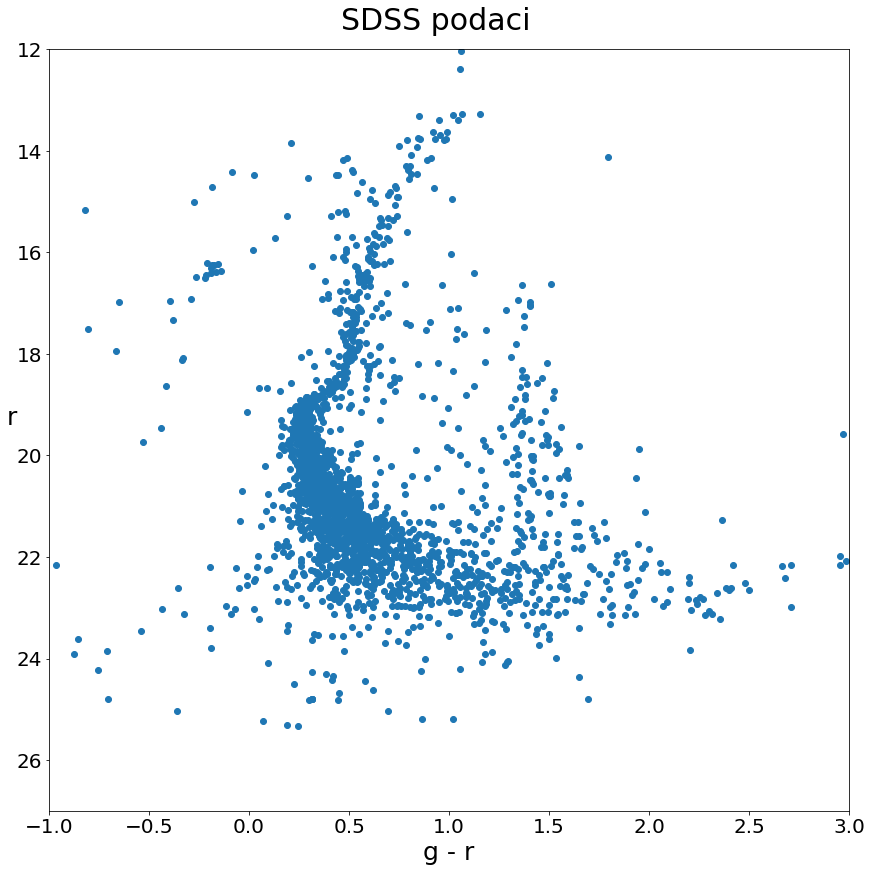

In [40]:
fig = plt.figure(figsize=(12, 12), layout='constrained')
fig.suptitle(f'SDSS podaci', fontsize=30)

ax2 = fig.add_subplot(111)
ax2.set_xlim(-1, 3)
ax2.set_ylim(12, 27)
ax2.invert_yaxis()
ax2.scatter(SDSStable['g'] - SDSStable['r'], SDSStable['r'])
ax2.set_xlabel('g - r',  fontsize=25)
ax2.set_ylabel('r',  fontsize=25, rotation=0)
ax2.tick_params(axis="x", labelsize=20) 
ax2.tick_params(axis="y", labelsize=20) 

plt.show()

In [41]:
isoS = pd.read_csv('primer_SDSS_izohrona.txt', sep="\t", header = 0)
isoS

,#EEP,M/Mo,LogTeff,LogG,LogL/Lo,sdss_u,sdss_g,sdss_r,sdss_i,sdss_z
0,13,0.111966,3.5386,5.3275,-2.7324,17.6848,14.0036,12.3306,11.5569,11.1422
1,14,0.123553,3.5458,5.2773,-2.6108,17.0951,13.5937,11.9600,11.2372,10.8428
2,15,0.137093,3.5532,5.2283,-2.4871,16.5147,13.1787,11.5880,10.9115,10.5374
3,16,0.151921,3.5600,5.1874,-2.3742,16.0019,12.8015,11.2528,10.6138,10.2577
4,17,0.166341,3.5658,5.1569,-2.2812,15.5883,12.4917,10.9798,10.3692,10.0273
...,...,...,...,...,...,...,...,...,...,...
262,275,0.814896,3.6214,0.5981,3.1904,1.1811,-1.6914,-2.8617,-3.3102,-3.5718
263,276,0.814900,3.6198,0.5676,3.2140,1.1968,-1.7206,-2.9076,-3.3629,-3.6288
264,277,0.814905,3.6182,0.5384,3.2367,1.2124,-1.7483,-2.9518,-3.4138,-3.6837
265,278,0.814909,3.6166,0.5100,3.2587,1.2282,-1.7747,-2.9943,-3.4631,-3.7371


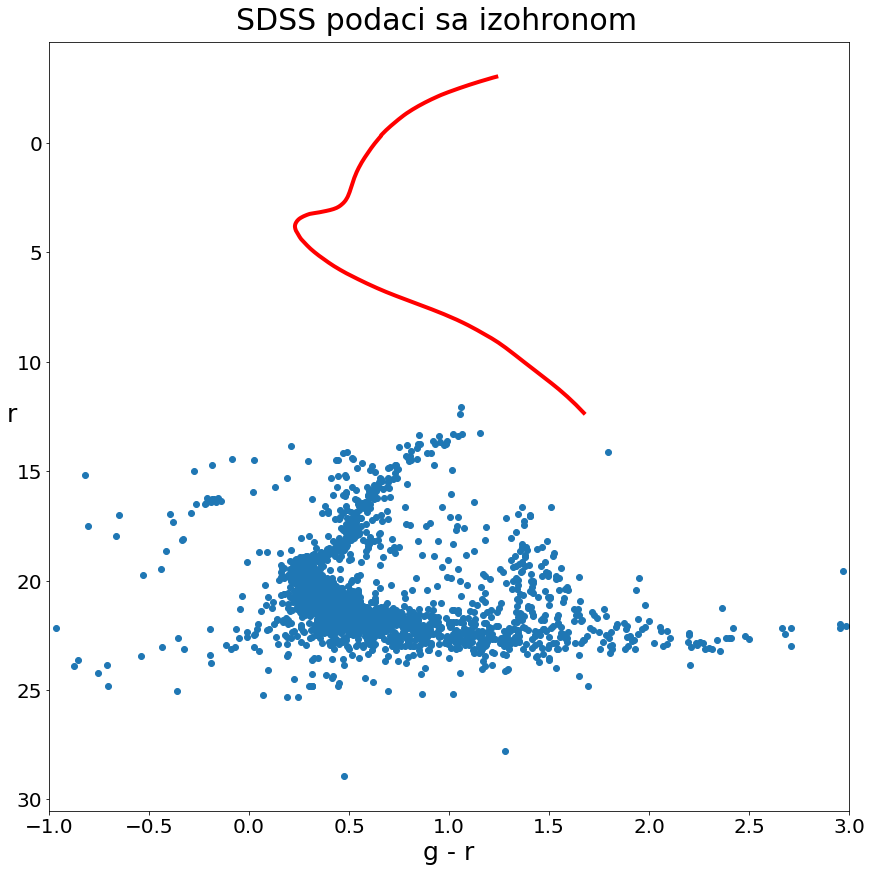

In [42]:
fig = plt.figure(figsize=(12, 12), layout='constrained')
fig.suptitle(f'SDSS podaci sa izohronom', fontsize=30)

ax2 = fig.add_subplot(111)
ax2.set_xlim(-1, 3)
ax2.invert_yaxis()
ax2.scatter((SDSStable['g'] - SDSStable['r']), SDSStable['r'])
ax2.set_xlabel('g - r',  fontsize=25)
ax2.set_ylabel('r',  fontsize=25, rotation=0)
ax2.tick_params(axis="x", labelsize=20) 
ax2.tick_params(axis="y", labelsize=20) 

ax2.plot(isoS['sdss_g']-isoS['sdss_r'], isoS['sdss_r'], 'r', linewidth=4)


plt.show()

In [43]:
#procena --> 15.65
isoS['fit_iso'] = isoS['sdss_r'] + 15.65

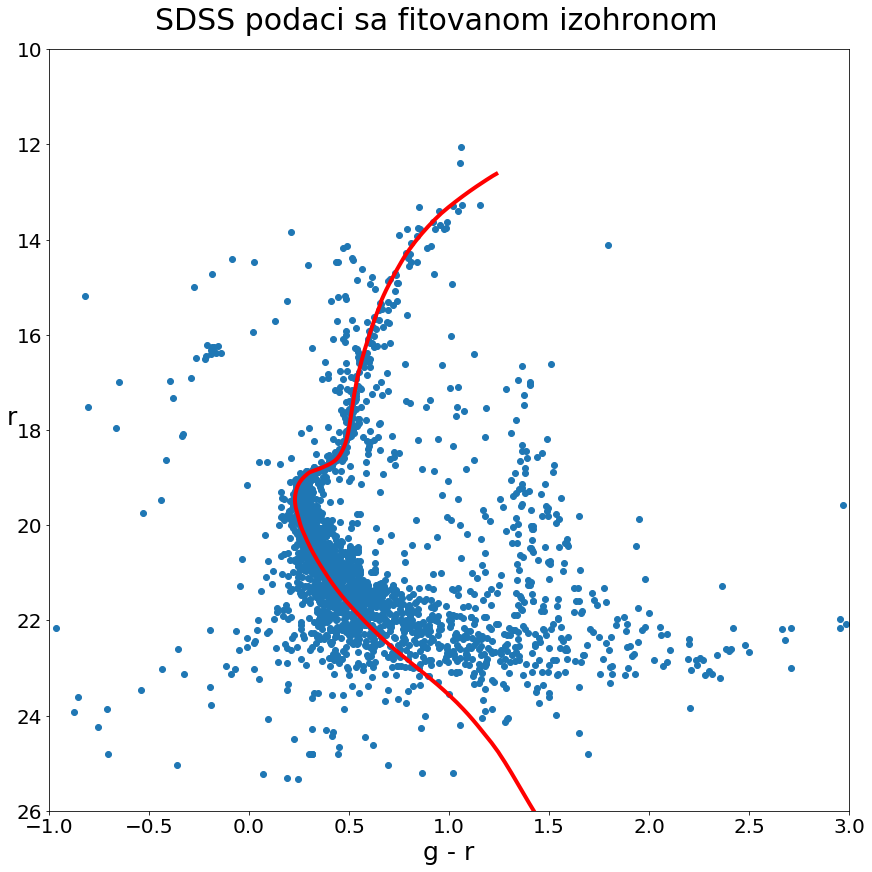

In [44]:
fig = plt.figure(figsize=(12, 12), layout='constrained')
fig.suptitle(f'SDSS podaci sa fitovanom izohronom', fontsize=30)


ax2 = fig.add_subplot(111)
ax2.set_xlim(-1, 3)
ax2.set_ylim(10, 26)
ax2.invert_yaxis()
ax2.scatter((SDSStable['g'] - SDSStable['r']), SDSStable['r'])
#ax2.scatter((Sdf2f['g'] - Sdf2f['r']), Sdf2f['r'])
ax2.set_xlabel('g - r',  fontsize=25)
ax2.set_ylabel('r',  fontsize=25, rotation=0)
ax2.tick_params(axis="x", labelsize=20) 
ax2.tick_params(axis="y", labelsize=20) 


ax2.plot(isoS['sdss_g']-isoS['sdss_r'], isoS['fit_iso'], 'r', linewidth=4)

plt.show()

In [45]:
# rastojanje iz fitovanja
mu = 15.65
d_e = 10**(mu/5+1)
print('fitovano rastojanje: d_e =',d_e, 'pc\n')

# rastojanje dobijeno iz HEASARC
d_t = all_jata['distance'][119]
print('tabelarno rastojanje: d_t =',d_t, 'pc\n')

# relativna greška u %
delta = abs(d_e - d_t)*100/d_t
print('relativna greška: delta =',delta, '%')

fitovano rastojanje: d_e = 13489.628825916532 pc

tabelarno rastojanje: d_t = 11507 pc

relativna greška: delta = 17.22976297833086 %


<hr><hr><hr><hr>

# GAIA

In [46]:
def sql_Gaia_all(ra, dec, radius):
    sql =  f"""  """
    return sql

In [47]:
#### IZLAZI ERROR JER NE PROSLEĐUJEMO NIŠTA SMISLENO #### 

sql_Gaia = sql_Gaia_all(pr_ra, pr_dec, pr_radius)
GaiaTable = Gaia.launch_job(sql_Gaia).get_results().to_pandas()

In [48]:
GaiaTable = pd.read_table('primer_Gaia')
GaiaTable

,source_id,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
0,2.686844e+18,323.310023,-0.842737,20.446335,20.101768,19.383250
1,2.686845e+18,323.295593,-0.799188,19.782990,19.562014,18.979733
2,2.686840e+18,323.372633,-0.889216,19.783295,19.583828,18.916908
3,2.686845e+18,323.302732,-0.805384,19.875383,19.432390,18.840946
4,2.686841e+18,323.371337,-0.857860,18.725588,18.264050,17.589912
...,...,...,...,...,...,...
2995,2.686841e+18,323.340307,-0.880830,19.882812,19.393978,19.286982
2996,2.686840e+18,323.361100,-0.904472,19.672777,19.661118,19.151463
2997,2.686841e+18,323.353298,-0.860662,16.766531,17.014870,16.224460
2998,2.686828e+18,323.419827,-0.934999,20.105614,20.331442,19.729420


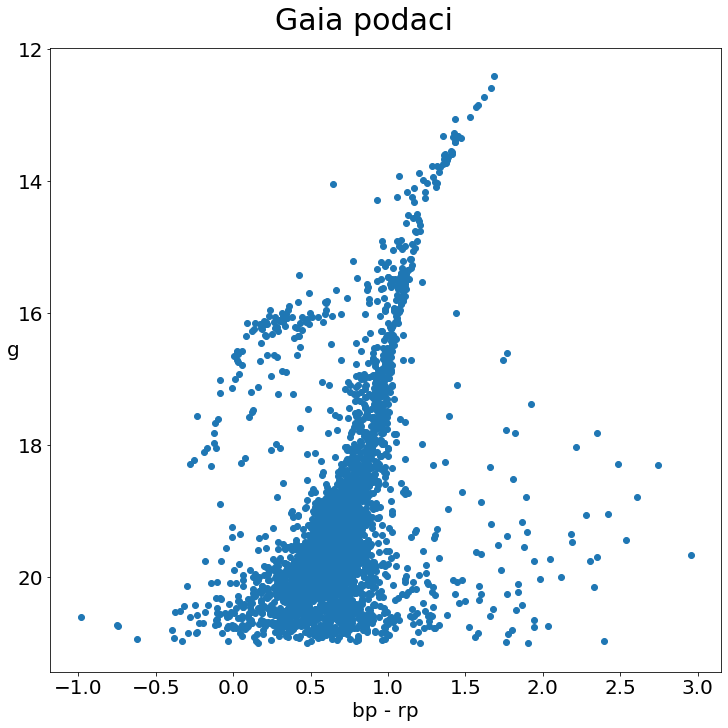

In [49]:
fig = plt.figure(figsize=(10, 10), layout='constrained')
fig.suptitle('Gaia podaci', fontsize=30)

ax1 = fig.add_subplot(111)
ax1.scatter(GaiaTable['phot_bp_mean_mag'] - GaiaTable['phot_rp_mean_mag'],\
            GaiaTable['phot_g_mean_mag'])
ax1.invert_yaxis()
ax1.set_xlabel('bp - rp', fontsize=20)
ax1.set_ylabel('g',  fontsize=20, rotation=0)

plt.show()

In [50]:
isoG = pd.read_csv('primer_Gaia_izohrona.txt', sep="\t", header = 8)
isoG

,#EEP,M/Mo,LogTeff,LogG,LogL/Lo,Gaia_G,Gaia_BP,Gaia_RP
0,13,0.111966,3.5386,5.3275,-2.7324,12.1334,13.2638,11.1332
1,14,0.123553,3.5458,5.2773,-2.6108,11.7900,12.8635,10.8120
2,15,0.137093,3.5532,5.2283,-2.4871,11.4422,12.4637,10.4862
3,16,0.151921,3.5600,5.1874,-2.3742,11.1263,12.1044,10.1896
4,17,0.166341,3.5658,5.1569,-2.2812,10.8672,11.8112,9.9461
...,...,...,...,...,...,...,...,...
262,275,0.814896,3.6214,0.5981,3.1904,-2.9170,-2.2246,-3.6993
263,276,0.814900,3.6198,0.5676,3.2140,-2.9662,-2.2657,-3.7534
264,277,0.814905,3.6182,0.5384,3.2367,-3.0136,-2.3051,-3.8056
265,278,0.814909,3.6166,0.5100,3.2587,-3.0594,-2.3431,-3.8562


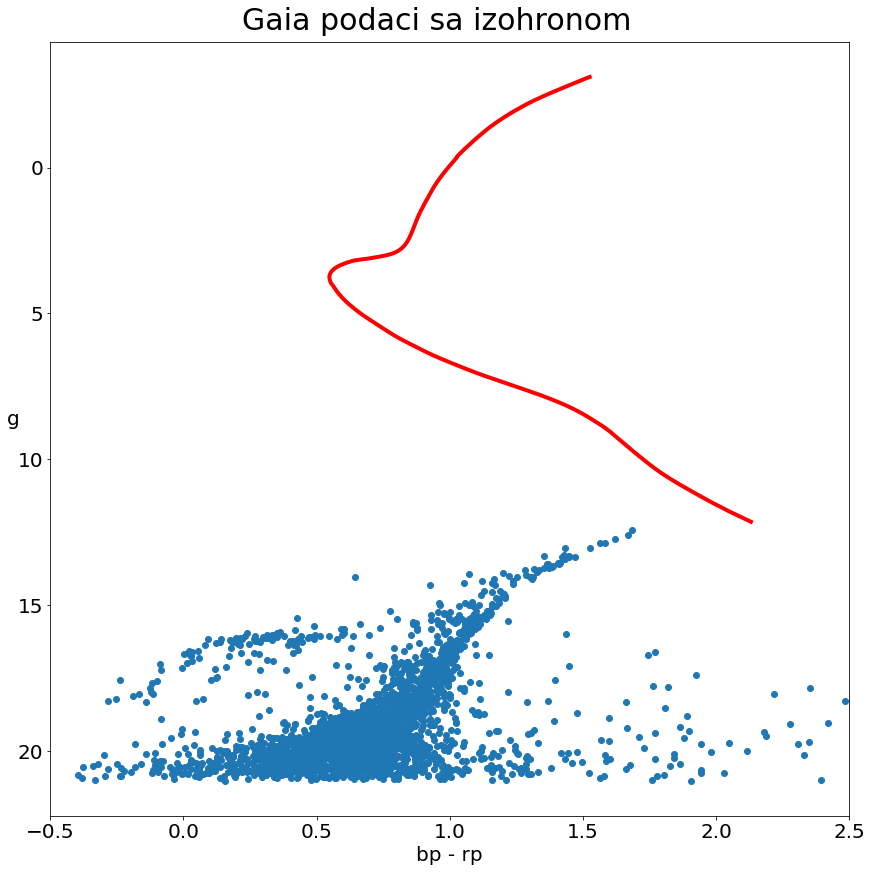

In [51]:
fig = plt.figure(figsize=(12, 12), layout='constrained')
fig.suptitle('Gaia podaci sa izohronom', fontsize=30)

ax1 = fig.add_subplot(111)

ax1.set_xlim(-0.5, 2.5)
ax1.invert_yaxis()

ax1.scatter(GaiaTable['phot_bp_mean_mag'] - GaiaTable['phot_rp_mean_mag'], GaiaTable['phot_g_mean_mag'])
ax1.set_xlabel('bp - rp', fontsize=20)
ax1.set_ylabel('g',  fontsize=20, rotation=0)

ax1.plot(isoG['Gaia_BP']-isoG['Gaia_RP'], isoG['Gaia_G'], 'r', linewidth=4)

plt.show()

In [52]:
isoG['fit_iso'] = isoG['Gaia_G'] + 16

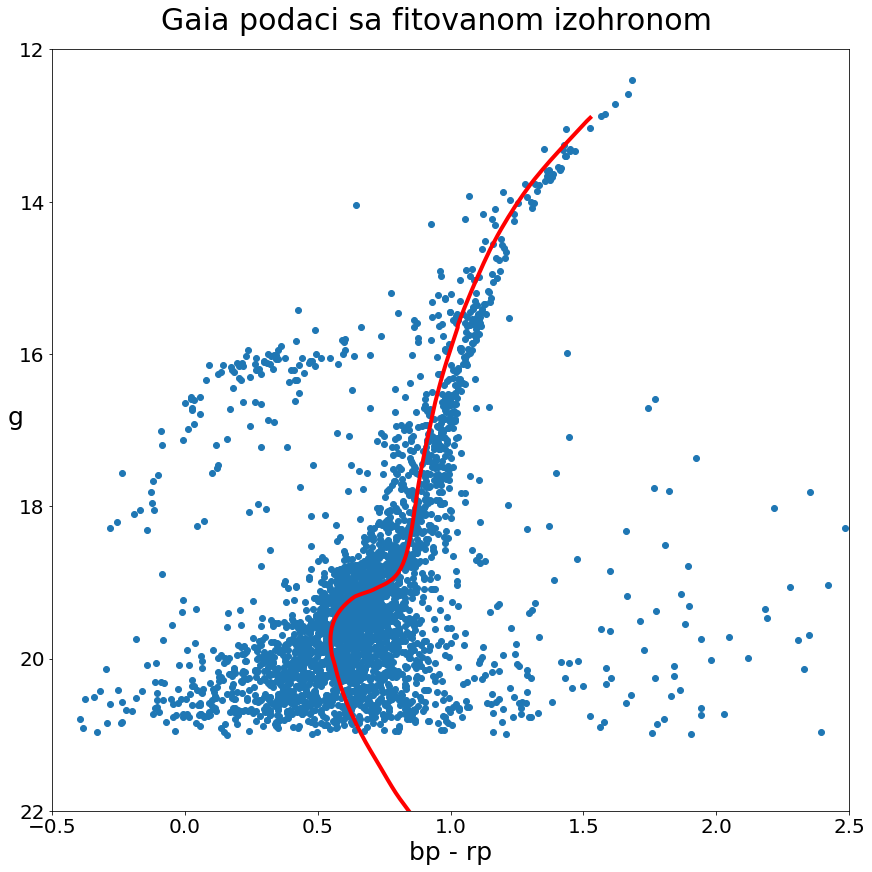

In [53]:
fig = plt.figure(figsize=(12, 12), layout='constrained')
fig.suptitle('Gaia podaci sa fitovanom izohronom', fontsize=30)

ax1 = fig.add_subplot(111)

ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(12, 22)
ax1.invert_yaxis()

ax1.scatter(GaiaTable['phot_bp_mean_mag'] - GaiaTable['phot_rp_mean_mag'], GaiaTable['phot_g_mean_mag'])
ax1.set_xlabel('bp - rp', fontsize=25)
ax1.set_ylabel('g',  fontsize=25, rotation=0)

ax1.plot(isoG['Gaia_BP']-isoG['Gaia_RP'], isoG['fit_iso'], 'r', linewidth=4)

plt.show()

In [54]:
# rastojanje iz fitovanja
mu = 16
d_e = 10**(mu/5+1)
print('fitovano rastojanje: d_e =',d_e, 'pc\n')

# rastojanje dobijeno iz HEASARC
d_t = all_jata['distance'][119]
print('tabelarno rastojanje: d_t =',d_t, 'pc\n')

# relativna greška u %
delta = abs(d_e - d_t)*100/d_t
print('relativna greška: delta =',delta, '%')

fitovano rastojanje: d_e = 15848.93192461114 pc

tabelarno rastojanje: d_t = 11507 pc

relativna greška: delta = 37.7329618893816 %


<hr><hr><hr><hr><hr>

# SDSS + Gaia

Poređenja radi, plotujemo obe tabele i izohrone.

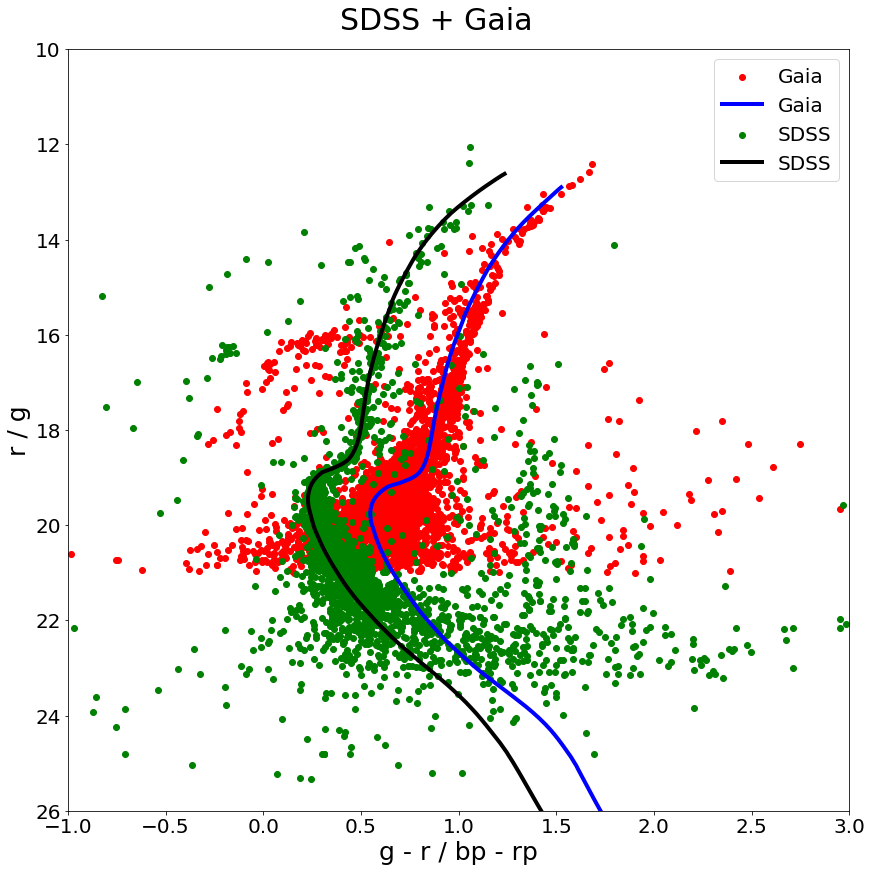

In [55]:
fig = plt.figure(figsize=(12, 12), layout='constrained')
fig.suptitle('SDSS + Gaia', fontsize=30)

ax1 = fig.add_subplot(111)
ax1.set_xlim(-1, 3)
ax1.set_ylim(10, 26)
ax1.invert_yaxis()
ax1.set_xlabel('g - r / bp - rp', fontsize=25)
ax1.set_ylabel('r / g',  fontsize=25)
ax1.tick_params(axis="x", labelsize=20) 
ax1.tick_params(axis="y", labelsize=20)

#Gaia
ax1.scatter(GaiaTable['phot_bp_mean_mag'] - GaiaTable['phot_rp_mean_mag'], GaiaTable['phot_g_mean_mag'],\
            color='r', label='Gaia')
ax1.plot(isoG['Gaia_BP']-isoG['Gaia_RP'], isoG['fit_iso'], color='b', linewidth=4, label='Gaia')

#SDSS
ax1.scatter((SDSStable['g'] - SDSStable['r']), SDSStable['r'], color='g', label = 'SDSS')
ax1.plot(isoS['sdss_g']-isoS['sdss_r'], isoS['fit_iso'], color='k', linewidth=4, label = 'SDSS')

plt.legend()
plt.show()

## Reference:

- The Hertzsprung-Russell Diagram of a Globular Cluster http://community.dur.ac.uk/ian.smail/gcCm/gcCm_intro.html
- Dokumentacija za ```speclite``` paket https://speclite.readthedocs.io/en/latest/index.html
- Dokumentacija za ```astroquery``` paket https://astroquery.readthedocs.io/en/latest/

- HEASARC baza podataka https://heasarc.gsfc.nasa.gov/W3Browse/all/mwsc.html
- HEASARC baza podataka, MWSC katalog https://heasarc.gsfc.nasa.gov/W3Browse/all/mwsc.html
- SDSS Data Release 17 https://www.sdss.org/dr17/
- SDSS Data Release 10 Sky Server http://skyserver.sdss.org/dr10/en/home.aspx
- SDSS Voyages http://voyages.sdss.org/
- Dartmouth Stellar Evolution Database http://stellar.dartmouth.edu/models/isolf_new.html

### Zanimljivi i korisni linkovi za dalje istraživanje:
- Galactic Globular Cluster Database 2 https://people.smp.uq.edu.au/HolgerBaumgardt/globular/
- CMD 3.6 (web interface for isochrones) http://stev.oapd.inaf.it/cgi-bin/cmd
- The Python Stellar Evolution Module https://kpenev.github.io/poet/python_stellar_evolution.html
- Dokumentacija za ```isochrones``` paket https://isochrones.readthedocs.io/en/latest/#